Data analysis

In [18]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [249]:
# Get csv files and setup fomc_events df
etf_list = pd.read_csv("ETF_LIST.csv")
fomc_events = pd.read_csv('FOMC_DATA.csv').iloc[0:]
fomc_events = fomc_events.iloc[:194]
fomc_events = fomc_events.reset_index(drop=True)
fomc_lower = fomc_events.query("action == 'lower'")
fomc_lower = fomc_events.reset_index(drop=True)
fomc_raise = fomc_events.query("action == 'raise'")
fomc_raise = fomc_events.reset_index(drop=True)
fomc_nothing = fomc_events.query("action == 'nothing'")
fomc_nothing = fomc_events.reset_index(drop=True)
fomc_events

,index,date,rate_before,rate_after,action
0,0,1994-02-04,3.00,3.25,raise
1,1,1994-03-22,3.25,3.50,raise
2,2,1994-05-17,3.50,4.25,raise
3,3,1994-07-06,4.25,4.25,nothing
4,4,1994-08-16,4.25,4.75,raise
...,...,...,...,...,...
189,189,2017-07-26,1.00,1.25,raise
190,190,2017-09-20,1.25,1.25,nothing
191,191,2017-11-01,1.25,1.25,nothing
192,192,2017-12-13,1.25,1.25,nothing


In [250]:
# Get all stock close prices => get 4 week returns
symbol = "SPY"
ticker = yf.Ticker(symbol)

fomc_dates = []
for x in range(len(fomc_events)):
  fomc_dates.append(datetime.strptime(fomc_events.loc[x,  'date'], '%Y-%m-%d'))

average_returns = []

for fomc_date in fomc_dates:
    start_date = fomc_date - pd.DateOffset(days=14)
    end_date = fomc_date + pd.DateOffset(days=14)
    history = ticker.history(start=start_date, end=end_date, period='1d')
    stock_returns = history['Close'].pct_change()
    average_return = stock_returns.mean()
    average_returns.append(average_return)

[-0.0002180574946555208, -0.003131768184714402, 0.0006850305272674458, 0.0001629159619165136, 0.0016624335554009135, -0.0008558768533335481, -0.0015043232170368131, 0.0003842904548682145, 0.001612959003836827, 0.0015714993525689268, 0.0014495270769776525, 0.000163703338205528, 0.0005453728268200145, 0.000248204008421229, 0.0020599621533300724, -0.00023823744087264295, 0.004614267435103228, 0.0008440273086852443, 0.0026368304519560873, -0.0029292011248598557, -0.0008664557163105608, 0.003154308378229749, 0.004137446860447457, 0.0006631473834977765, 0.0021482083037586883, -0.0033244950721784314, 0.001011661023642591, 0.002251589803778906, -0.0028210104661138082, 0.001399743520348878, 0.0019371683546272349, -0.0008116306016970455, 0.003125542836161652, 0.001348038988652267, -0.0009701421739580095, 0.0032782046240103194, -0.005455655267829546, -0.0017504000221791648, 0.0025370042530267942, 0.0025368826555003323, -0.001383037208879291, 0.002561288889445074, -0.0014314854177563457, 0.0026663

In [251]:
# Merge data together
output = fomc_events
output['etf_returns'] = average_returns
output

,index,date,rate_before,rate_after,action,etf_returns
0,0,1994-02-04,3.00,3.25,raise,-0.000218
1,1,1994-03-22,3.25,3.50,raise,-0.003132
2,2,1994-05-17,3.50,4.25,raise,0.000685
3,3,1994-07-06,4.25,4.25,nothing,0.000163
4,4,1994-08-16,4.25,4.75,raise,0.001662
...,...,...,...,...,...,...
189,189,2017-07-26,1.00,1.25,raise,0.000699
190,190,2017-09-20,1.25,1.25,nothing,0.001521
191,191,2017-11-01,1.25,1.25,nothing,0.000417
192,192,2017-12-13,1.25,1.25,nothing,0.001231


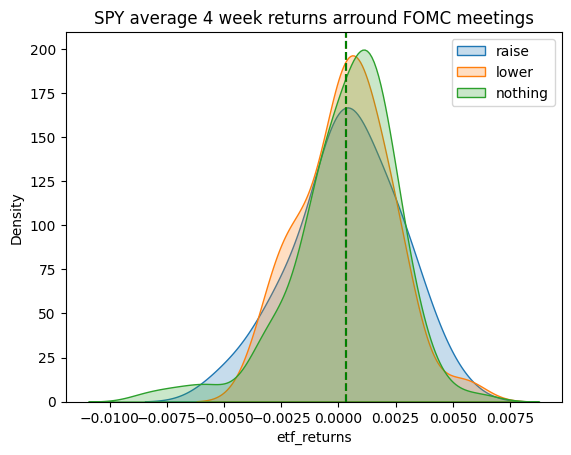

In [252]:
raise_returns = output.query("action == 'raise'")['etf_returns']
lower_returns = output.query("action == 'lower'")['etf_returns']
nothing_returns = output.query("action == 'nothing'")['etf_returns']
sns.kdeplot(data=lower_returns, fill=True, label='raise')
sns.kdeplot(data=raise_returns, fill=True, label='lower')
sns.kdeplot(data=nothing_returns, fill=True, label='nothing')
plt.axvline(x=raise_returns.mean(), color='blue', linestyle='--')
plt.axvline(x=lower_returns.mean(), color='orange', linestyle='--')
plt.axvline(x=nothing_returns.mean(), color='green', linestyle='--')
plt.title(f"{symbol} average 4 week returns arround FOMC meetings")
plt.legend()

Script for Creating 4 Week Charts

In [ ]:
# Get stock data within the two week window +/- of an FOMC event
fomc_dates = []
for x in range(10):
  fomc_dates.append(datetime.strptime(fomc_events.loc[x + 15,  'date'], '%Y-%m-%d'))

symbol = ['IWV'] # Russel 3000 ETF (iShares), TLT Treasuries
for fomc_date in fomc_dates:
  start_date = fomc_date - timedelta(days=14)
  end_date = fomc_date + timedelta(days=14) 
  stock_data = yf.download(symbol,start_date, end_date)
  stock_data['Returns'] = stock_data['Close'].pct_change()
  stock_data = stock_data.reindex(['Close', 'Returns'], axis=1)

  plt.figure(figsize=(10, 6))
  sns.lineplot(data=stock_data, x='Date', y="Close")
  plt.xticks(rotation=45)
  plt.axvline(x=fomc_date, color='red', linestyle='--')
  plt.title(f"{fomc_date.strftime('%Y-%m-%d')} {fomc_events.loc[x+15, 'action']}")
  plt.savefig(f"stock_returns_{fomc_date.strftime('%Y-%m-%d')}.png")
  plt.close()
